# k-Nearest-Neighbors
![wilson](img/wilson.jpg)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score
from src.confusion import plot_confusion_matrix
from src.k_classify import predict_one
from src.plot_train import *
from src.euclid import *

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold

# Objectives
- Describe the $k$-nearest neighbors algorithm
- Identify multiple common distance metrics
- Tune $k$ appropriately in response to models with high bias or variance

# Concept of the $k$-Nearest Neighbors Algorithm
> In **supervised learning** we use example data (_training data_) to inform our predictions of future data. 
One strategy to make predictions on a new data is to just look at what similar data points are like.

![](img/best_k_fs.png)
We can say _nearby_ points are _similar_ to one another. There are a few different wasy to determine how "close" data points are to one another. 
![](https://miro.medium.com/max/1400/1*FlMiuoENrq52tMV4S6LSZg.png)

* Euclidean and Manhattan distance is best used for continuous variables.<br/> 
Check out the [Level Up section on distance metrics](#Level-Up:-Distance-Metrics) for some more detail.

## Summary of $k$NN
![](img/knn-process.png)

**The algorithm can be summarized as:**
1. A positive integer k is specified, along with a new sample
2. We select the k entries in our database which are closest to the new sample
3. We find the most common classification of these entries(voting)
4. This is the classification we give to the new sample

**A few other features of KNN:**
* KNN stores the entire training dataset which it uses as its representation.
* KNN does not learn any model parameters.
* KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.

**Note:** KNN performs better with a low number of features. The more features you have the more data you need. You increase the dimensions everytime you add another feature. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

## Implementing in Scikit-Learn

In [2]:
iris = sns.load_dataset('iris')
display(iris)
# Let's convert this over to NumPy array
X = iris.iloc[:,:2].to_numpy()
# Let's convert classes to numerical values
y = LabelEncoder().fit_transform(iris['species'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

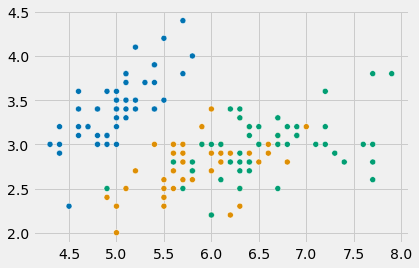

In [4]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax, hue=y, palette='colorblind')
ax.get_legend().remove()

### Training the KNN

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, y) 

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Make Some Predictions

In [6]:
# Made up data points
pred_pts = np.array([
    [7.0, 3.0],
    [8.0, 3.5],
    [7.0, 4.0],    
    [4.0, 3.0],
    [5.0, 3.0],
    [5.5, 4.0],
    [5.0, 2.0],
    [6.0, 2.5],
    [5.8, 3.5],
])

Let's see these new points against the training data. Think about how they'll be made classified.

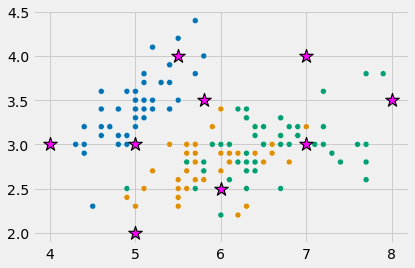

In [7]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:,0], y=X[:,1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:,0], ax=ax, y=pred_pts[:,1], marker="*", s=200, edgecolor='black', color='magenta')
ax.get_legend().remove()

In [8]:
# Make predictions
pred_y = neigh.predict(pred_pts)
print(pred_y)

[2 2 2 0 0 0 1 1 0]


In [9]:
# Probabilities for KNN (how they voted)
for p,prob in zip(pred_y,neigh.predict_proba(pred_pts)):
    print(f'{p}: {prob}')

2: [0. 0. 1.]
2: [0. 0. 1.]
2: [0. 0. 1.]
0: [1. 0. 0.]
0: [1. 0. 0.]
0: [1. 0. 0.]
1: [0. 1. 0.]
1: [0.         0.66666667 0.33333333]
0: [0.66666667 0.33333333 0.        ]


Let's see those predictions plotted with the other points after the classification.

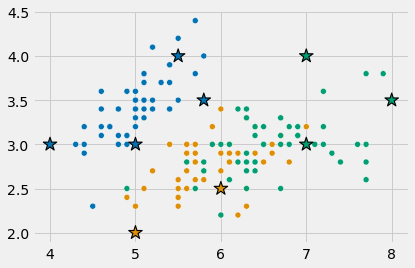

In [10]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:,0],y=X[:,1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:,0], ax=ax, y=pred_pts[:,1], hue=pred_y, palette='colorblind', marker="*", s=200, edgecolor='black')
ax.get_legend().remove()

# The Pros and Cons

## Pros:
- Lazy learning (no training phase)
- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

## Cons: 
- Computationally expensive — because the algorithm stores all of the training data. High memory requirement
- Prediction stage might be slow with large datasets
- Sensitive to irrelevant features and the scale of the data
- Not robust; doesn't generalize well
- "Curse of Dimensionality"

# Let's Classify with the Titanic Dataset 

In [11]:
titanic = pd.read_csv('data/cleaned_titanic.csv')
titanic = titanic.iloc[:, :-2]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male
0,1,0,3,22.0,1,0,7.2500,False,1
1,2,1,1,38.0,1,0,71.2833,False,0
2,3,1,3,26.0,0,0,7.9250,False,0
3,4,1,1,35.0,1,0,53.1000,False,0
4,5,0,3,35.0,0,0,8.0500,False,1


**For visualization purposes, we will use only two features for our first model. This dataset presents a binary classification problem, with our target being the `Survived` feature.**

In [12]:
X = titanic[['Age', 'Fare']]
y = titanic['Survived']
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

## Validation Split 
**We've only seen this in the context of cross-validation but we can split our training data again into a training/validation set.**

In [14]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

training accuracy: 0.7474949899799599
validation accuracy: 0.6586826347305389
Confusion Matrix, without normalization
[[76 25]
 [32 34]]


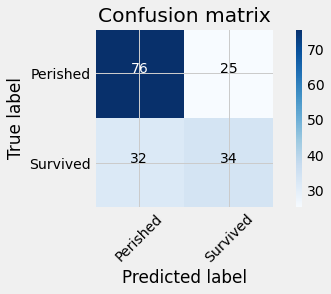

In [15]:
knn = KNeighborsClassifier()

knn.fit(X_t, y_t)
print(f"training accuracy: {knn.score(X_t, y_t)}")
print(f"validation accuracy: {knn.score(X_val, y_val)}")

y_hat = knn.predict(X_val)

plot_confusion_matrix(confusion_matrix(y_val, y_hat), classes=['Perished', 'Survived'])

The $k$-NN algorithm works by simply storing the training set in memory, then measuring the distance from the training points to a new point.

Let's view our validation set.

/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


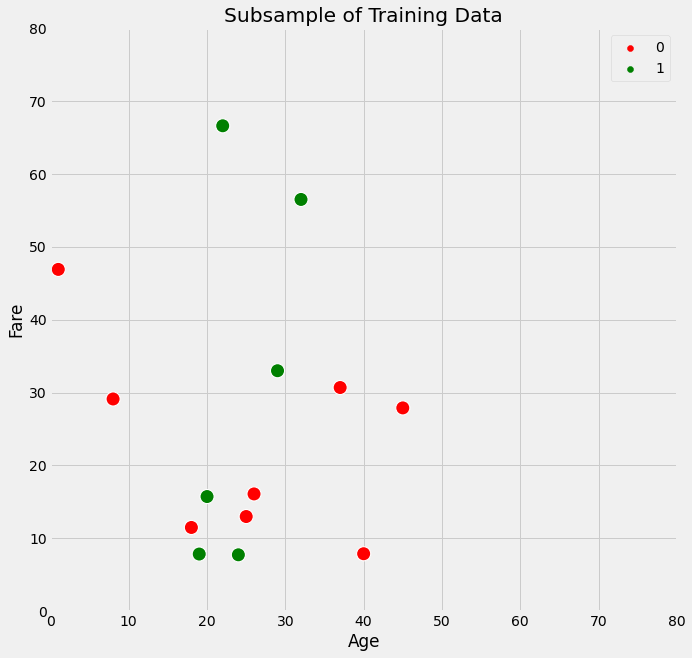

In [16]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], 
                hue=y_for_viz, palette={0: 'red', 1: 'green'}, 
                s=200, ax=ax)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
plt.legend()
plt.title('Subsample of Training Data');

/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


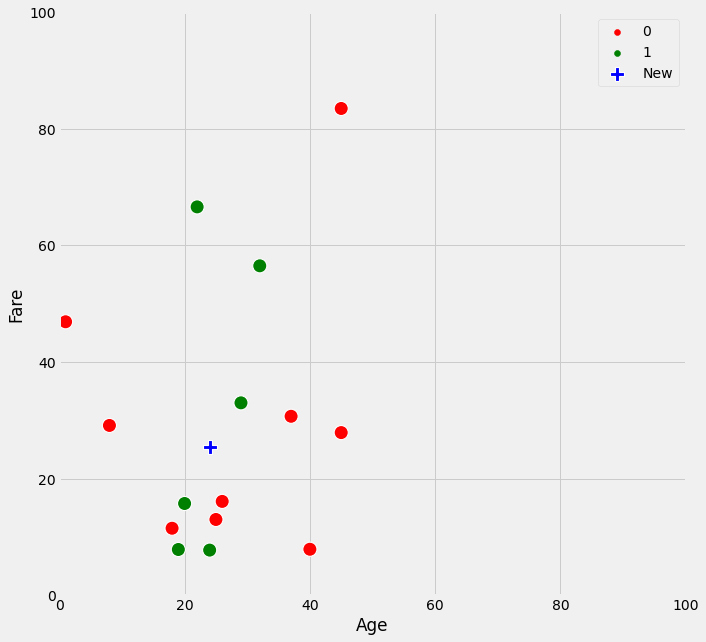

In [17]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'],
                hue=y_for_viz, palette={0: 'red', 1: 'green'},
                s=200, ax=ax)

plt.legend()

#################^^^Old code^^^##############
####################New code#################

# Let's take one sample from our validation set and plot it
new_x = pd.DataFrame(X_val.loc[484]).T
new_y = y_val[new_x.index]

sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue',
                s=200, ax=ax, label='New', marker='P')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [18]:
new_x

,Age,Fare
484,24.0,25.4667


Then, $k$-NN finds the $k$ nearest points. $k$ corresponds to the `n_neighbors` parameter defined when we instantiate the classifier object. **If $k$ = 1, then the prediction for a point will simply be the value of the target for the nearest point.**

## Different $k$ Values
A big factor in this algorithm is choosing $k$
![](img/k_vs_errors.png)

Let's fit our training data, then predict what our validation point will be based on the (one) closest neighbor.

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

array([1])

**When we raise the value of $k$, $k$-NN will act democratically: It will find the $k$ closest points, and take a vote based on the labels.**

Let's raise $k$ to 3.

In [21]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn3.fit(X_for_viz, y_for_viz)
knn3.predict(new_x)

array([1])

It's not easy to tell what which points are closest by eye.

Let's update our plot to add indices.

      Age     Fare
484  24.0  25.4667


/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


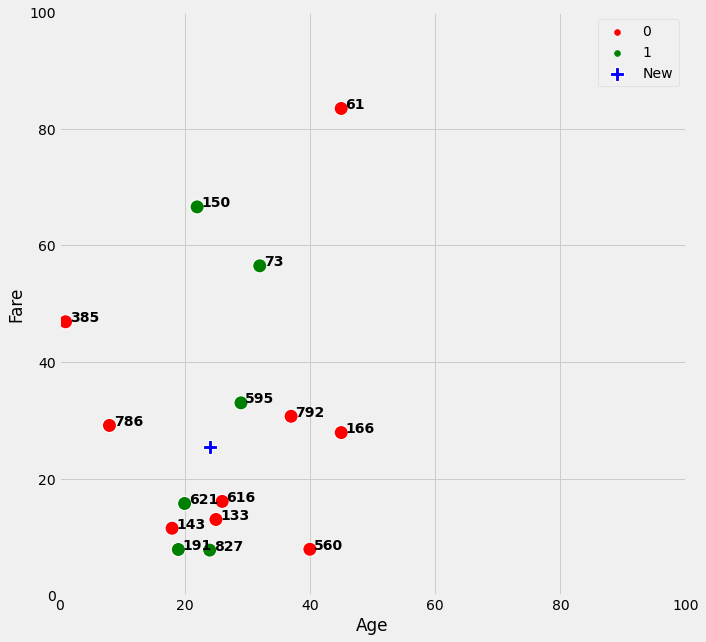

In [23]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], hue=y_for_viz, 
                palette={0: 'red', 1: 'green'}, s=200, ax=ax)


# Now let's take another sample

# new_x = X_val.sample(1, random_state=33)
new_x = pd.DataFrame(X_val.loc[484]).T
new_x.columns = ['Age', 'Fare']
new_y = y_val[new_x.index]

print(new_x)
sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue', 
                s=200, ax=ax, label='New', marker='P')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.legend()

#################^^^Old code^^^##############
####################New code#################

# add annotations one by one with a loop
for index in X_for_viz.index:
    ax.text(X_for_viz.Age[index]+0.7, X_for_viz.Fare[index],
            s=index, horizontalalignment='left', size='medium',
            color='black', weight='semibold')

We can use `sklearn`'s NearestNeighors object to see the exact calculations.

In [24]:
df_for_viz = pd.merge(X_for_viz, y_for_viz, left_index=True, right_index=True)
neighbor = NearestNeighbors(3)
neighbor.fit(X_for_viz)
nearest = neighbor.kneighbors(new_x)

nearest

/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(array([[ 9.04160433,  9.5778426 , 10.51549452]]), array([[11,  5,  0]]))

In [25]:
df_for_viz.iloc[nearest[1][0]]

,Age,Fare,Survived
595,29.0,33.0000,1
616,26.0,16.1000,0
621,20.0,15.7417,1


In [26]:
new_x

,Age,Fare
484,24.0,25.4667


In [27]:
# Use Euclidean distance to see how close they are to this point
print(((29-24)**2 + (33-25.4667)**2)**0.5)
print(((26-24)**2 + (16.1-25.4667)**2)**0.5)
print(((20-24)**2 + (15.7417-25.4667)**2)**0.5)

9.041604331643805
9.57784260102451
10.515494519992865


How about with 5 neighbors? 

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

array([0])

### Observing Different $k$ Values
Let's iterate through $k$, odd numbers 1 through 10, and see the predictions.

In [29]:
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_for_viz, y_for_viz)
    print(f'k={k}', knn.predict(new_x))

k=1 [1]
k=3 [1]
k=5 [0]
k=7 [0]
k=9 [0]


In [30]:
new_y

484    0
Name: Survived, dtype: int64

## Scaling
For any distance-based algorithms, scaling is very important. Look at how the shape of the array changes before and after scaling.

![non-normal](img/nonnormal.png)

![normal](img/normalized.png)

Let's look at our data_for_viz dataset:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=5)

ss = StandardScaler()
X_ind = X_t.index
X_col = X_t.columns

X_t_s = pd.DataFrame(ss.fit_transform(X_t))
X_t_s.index = X_ind
X_t_s.columns = X_col

X_v_ind = X_val.index
X_val_s = pd.DataFrame(ss.transform(X_val))
X_val_s.index = X_v_ind
X_val_s.columns = X_col

knn.fit(X_t_s, y_t)
print(f"training accuracy: {knn.score(X_t_s, y_t)}")
print(f"Val accuracy: {knn.score(X_val_s, y_val)}")

y_hat = knn.predict(X_val_s)

training accuracy: 0.717434869739479
Val accuracy: 0.6467065868263473


/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

      Age     Fare
484  24.0  25.4667
        Age      Fare
484 -0.4055 -0.154222


/Users/amberyandow/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


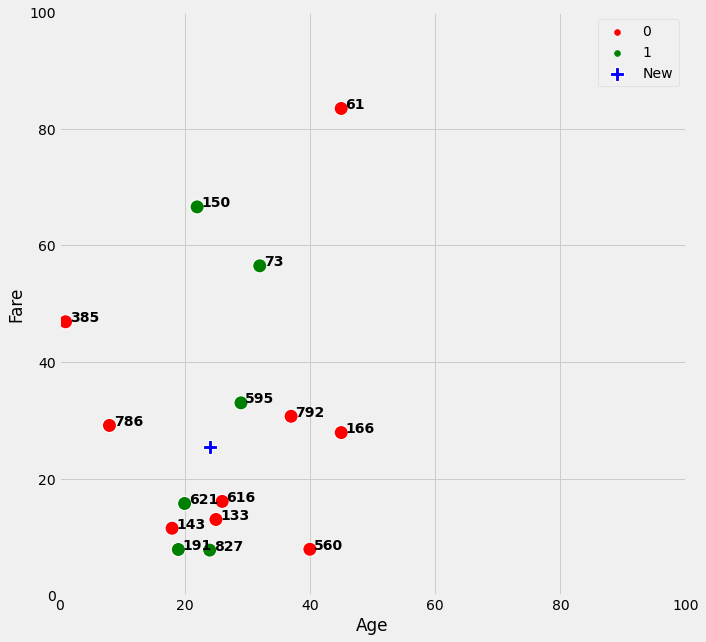

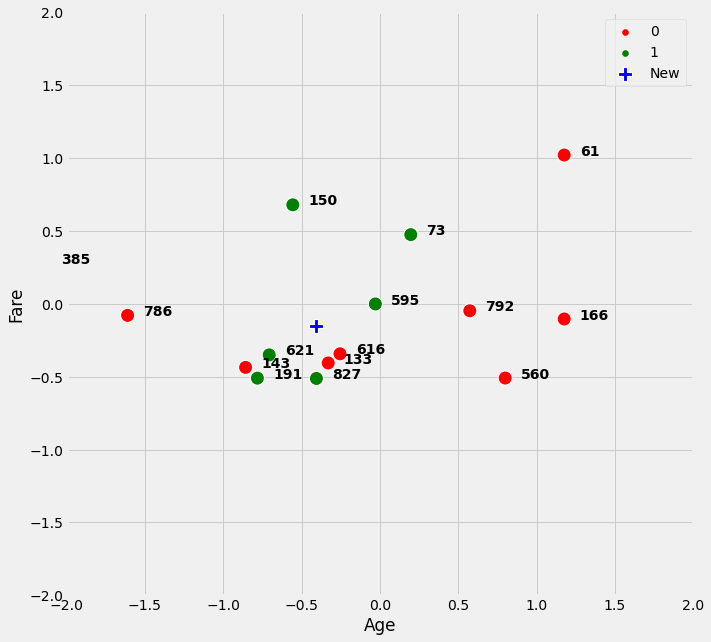

In [32]:
# The plot_train() function just does what we did above.

plot_train(X_t, y_t, X_val, y_val)
plot_train(X_t_s, y_t, X_val_s, y_val, -2, 2, text_pos=0.1 )

Look at how much that changes things.

Look at points 166 and 150.  
Look at the group 621, 143, and 191.

Now let's run our classifier on scaled data and compare to unscaled.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

# The predict_one() function prints predictions on a given point
# (#484) for k-nn models with k ranging from 1 to 10.

predict_one(X_t, X_val, y_t, y_val)

[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [34]:
mm = MinMaxScaler()

X_t_s = pd.DataFrame(mm.fit_transform(X_t))
X_t_s.index = X_t.index
X_t_s.columns = X_t.columns

X_val_s = pd.DataFrame(mm.transform(X_val))
X_val_s.index = X_val.index
X_val_s.columns = X_val.columns


predict_one(X_t_s, X_val_s, y_t, y_val)

[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]


# $k$ and the Bias-Variance Tradeoff
> Small $k$ values leads to overfitting, but larger $k$ values tend towards underfitting

![alt text](img/K-NN_Neighborhood_Size_print.png)
> From [Machine Learning Flashcards](https://machinelearningflashcards.com/) by Chris Albon

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

In [36]:
# Let's slowly increase k and see what happens to our accuracy scores.

kf = KFold(n_splits=5)

k_scores_train = {}
k_scores_val = {}


for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_score_t = []
    accuracy_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind] 
        X_v, y_v = X_train.iloc[val_ind], y_train.iloc[val_ind]
        mm = MinMaxScaler()
        
        X_t_ind = X_t.index
        X_v_ind = X_v.index
        
        X_t = pd.DataFrame(mm.fit_transform(X_t))
        X_t.index = X_t_ind
        X_v = pd.DataFrame(mm.transform(X_v))
        X_v.index = X_v_ind
        
        knn.fit(X_t, y_t)
        
        y_pred_t = knn.predict(X_t)
        y_pred_v = knn.predict(X_v)
        
        accuracy_score_t.append(accuracy_score(y_t, y_pred_t))
        accuracy_score_v.append(accuracy_score(y_v, y_pred_v))
        
        
    k_scores_train[k] = np.mean(accuracy_score_t)
    k_scores_val[k] = np.mean(accuracy_score_v)

In [37]:
k_scores_train

{1: 0.9527049330643681,
 2: 0.7991818194642328,
 3: 0.786796258940033,
 4: 0.7440004796230727,
 5: 0.7391153775621041,
 6: 0.7181008336977528,
 7: 0.7135951981266487,
 8: 0.7060876863829367,
 9: 0.7038299313010482,
 10: 0.7019579906614567,
 11: 0.7023381624793691,
 12: 0.7023395731354654,
 13: 0.6982049401176488,
 14: 0.6982063507737448,
 15: 0.7019636332858412,
 16: 0.6940759497242168,
 17: 0.6970771205687767,
 18: 0.6944497735896966,
 19: 0.6967018860472005}

In [38]:
k_scores_val

{1: 0.6262035686230502,
 2: 0.6352485691841544,
 3: 0.6066883626977893,
 4: 0.6502749410840535,
 5: 0.6472225339468073,
 6: 0.6532936819661093,
 7: 0.6412411626080126,
 8: 0.6577712939064078,
 9: 0.6712939064078105,
 10: 0.6712939064078105,
 11: 0.6577937380765346,
 12: 0.6727976658063068,
 13: 0.660823701043654,
 14: 0.6668050723824487,
 15: 0.6547862192795422,
 16: 0.6607900347884638,
 17: 0.6517450342273594,
 18: 0.6547749971944787,
 19: 0.656278756592975}

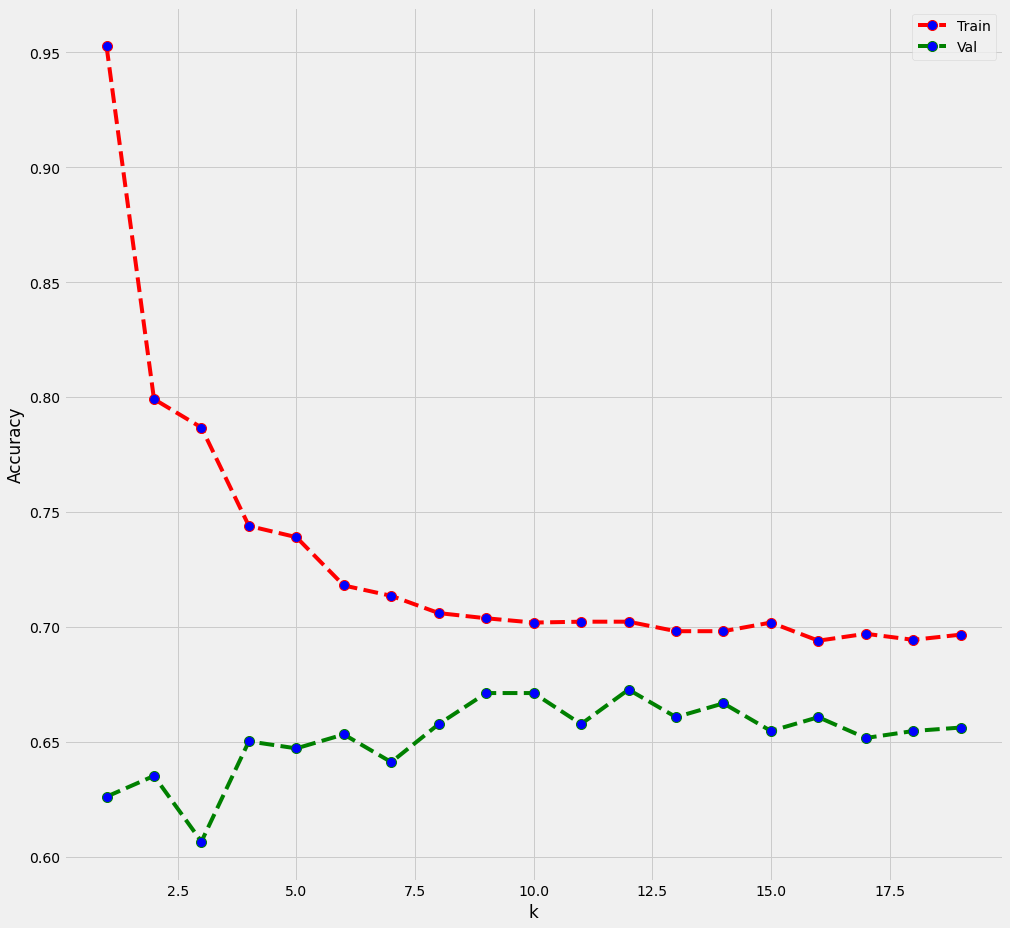

In [39]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
plt.legend();